# Fast Multipole Method 2 - From Greengard and Rokhlin (1997)
## Upwards Pass Initialisation
- The number of refinement levels $n\approx \log_8 N$.
- Order of multipole expansion desired is $p$.
- Number of boxes at the finest level is then $8^n$
- Number of particles per box is $s=N/8^n$

n_levels 7
p 6


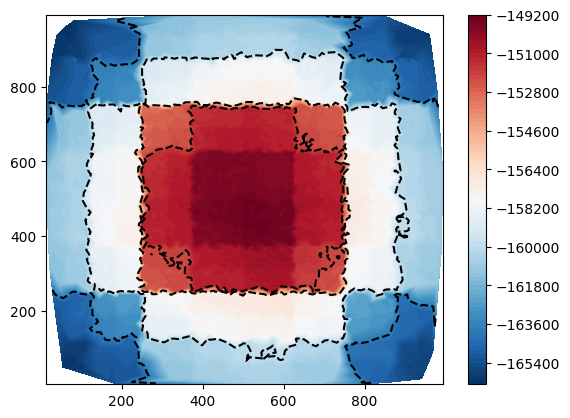

In [2]:
from ipynb.fs.defs.FMM1 import Particle, Mesh

n_particles = 5000
precision = 40
box_size = 1000
# property could be mass or charge 
np.random.seed(100)
max_property = 10
n_levels = int(np.ceil(np.emath.logn(4, n_particles)))
p = int(np.ceil(np.log2(precision)))
print(f'n_levels {n_levels}')
print(f'p {p}')
# initial_radii = np.random.beta(1,2,(n_particles)) * box_size/2
# initial_angles = np.random.uniform(0,2*np.pi,(n_particles))
# initial_xs = initial_radii * np.cos(initial_angles) + box_size/2
# initial_ys = initial_radii * np.sin(initial_angles) + box_size/2
# initial_positions = np.array([initial_xs, initial_ys]).transpose()
initial_positions = np.random.beta(2,2,(n_particles,2)) * box_size

initial_particles = []
for initial_position in initial_positions:
    initial_particles.append(Particle(initial_position, np.random.uniform(0,max_property)))
#initial_particles.append(Particle([box_size/2, box_size/2], 100))
#n_particles += 1

# Initialisaiton
mesh = Mesh(box_size, n_levels, p)
for particle in initial_particles:
    mesh.add_particle(particle)
    #print(particle.property)

# FMM
mesh.calc_fine_mpes() # Step 1
mesh.calc_coarse_mpes() # Step 2
mesh.calc_local_expansions() # Step 3 and 4
mesh.calc_le_particle_potentials() # Step 5
mesh.calc_neighbour_particle_potentials() # Step 6 and 7
mesh.plot_potential()